In [145]:
!pip install seaborn

    100% |################################| 225kB 2.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from datetime import datetime
import time
from os import listdir
from os.path import isfile, join
import re

plt.rcParams.update(plt.rcParamsDefault)

In [2]:
df = pd.read_csv('data/OxCGRT_Download_280420_171537_Full.csv')

In [91]:
print(df.columns.values)

['CountryName' 'CountryCode' 'Date' 'S1_School closing' 'S1_IsGeneral'
 'S1_Notes' 'S2_Workplace closing' 'S2_IsGeneral' 'S2_Notes'
 'S3_Cancel public events' 'S3_IsGeneral' 'S3_Notes'
 'S4_Close public transport' 'S4_IsGeneral' 'S4_Notes'
 'S5_Public information campaigns' 'S5_IsGeneral' 'S5_Notes'
 'S6_Restrictions on internal movement' 'S6_IsGeneral' 'S6_Notes'
 'S7_International travel controls' 'S7_Notes' 'S8_Fiscal measures'
 'S8_Notes' 'S9_Monetary measures' 'S9_Notes'
 'S10_Emergency investment in health care' 'S10_Notes'
 'S11_Investment in Vaccines' 'S11_Notes' 'S12_Testing framework'
 'S12_Notes' 'S13_Contact tracing' 'S13_Notes' 'ConfirmedCases'
 'ConfirmedDeaths' 'StringencyIndex' 'StringencyIndexForDisplay'
 'Unnamed: 39']


In [98]:
category_names = np.take(df.columns.values, [3, 6, 9, 12, 15, 18, 21, 23, 25, 27, 29, 31, 33])
category_names


array(['S1_School closing', 'S2_Workplace closing',
       'S3_Cancel public events', 'S4_Close public transport',
       'S5_Public information campaigns',
       'S6_Restrictions on internal movement',
       'S7_International travel controls', 'S8_Fiscal measures',
       'S9_Monetary measures', 'S10_Emergency investment in health care',
       'S11_Investment in Vaccines', 'S12_Testing framework',
       'S13_Contact tracing'], dtype=object)

In [95]:
df.sample(5)

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,...,S11_Notes,S12_Testing framework,S12_Notes,S13_Contact tracing,S13_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39
2933,Switzerland,CHE,20200228,0.0,NaN,NaN,0.0,NaN,NaN,1.0,...,NaN,2.0,'the tests for people with flu-like symptoms i...,1.0,"'In canton Zurich, 17 'detectives' were operat...",8.0,0.0,9.52,9.52,\t
1853,Bosnia and Herzegovina,BIH,20200114,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.00,0.00,\t
15132,Syria,SYR,20200204,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,4.76,4.76,\t
924,Austria,AUT,20200105,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,I couldn't find data on testing before Feb 28 ...,NaN,NaN,0.0,0.0,0.00,0.00,\t
12448,Philippines,PHL,20200420,2.0,1.0,Ref: UNESCO Global monitoring of school closur...,1.0,1.0,Quotation: Refer to point 4 and 5 (alternative...,2.0,...,No data available,2.0,Link: https://drive.google.com/open?id=1TSKVeY...,2.0,Link: https://drive.google.com/file/d/17uiHk4F...,6259.0,409.0,85.71,85.71,\t


In [28]:
notes_cols = [x.endswith('Notes') for x in df.columns]
#notes_cols.append(['CountryName', 'CountryCode'])
notes_cols_names = df.columns[notes_cols]
nnotes = df[notes_cols_names].dropna(how='all').count().sum()
print("Number of notes on interventions: ", nnotes)

Number of notes on interventions:  47098


In [14]:
notes = df[notes_cols_names].dropna(how='all')

In [99]:
%%time

cols = ['source', 'category', 'category_name']
df2 = pd.DataFrame(columns=cols)
for row, row_df in notes.iterrows():
    #print(row_df)
    for c, source in row_df.iteritems():
        if pd.isna(source):
            continue
        c_numerical = int(c.split('_')[0][1:])
        c_name = category_names[c_numerical-1]
        #print(cat_numerical, source)
        row = pd.DataFrame([[source, c_numerical, c_name]], columns=cols)
        df2 = df2.append(row)

CPU times: user 2min 12s, sys: 0 ns, total: 2min 12s
Wall time: 2min 12s


In [100]:
df2.shape

(47098, 3)

In [101]:
# discard duplicates
df2_d = df2.drop_duplicates()
df2_d.shape

(5115, 3)

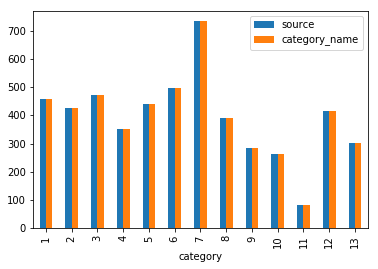

In [102]:
df2_d.groupby(by='category').count().plot.bar()

# Word embeddings

In [129]:
categories = df2_d[['category', 'category_name']].drop_duplicates()
categories = categories.sort_values(by='category')
categories

,category,category_name
0,1,S1_School closing
0,2,S2_Workplace closing
0,3,S3_Cancel public events
0,4,S4_Close public transport
0,5,S5_Public information campaigns
0,6,S6_Restrictions on internal movement
0,7,S7_International travel controls
0,8,S8_Fiscal measures
0,9,S9_Monetary measures
0,10,S10_Emergency investment in health care


In [138]:
data = df2_d['source']
y = df2_d['category'].astype(int)
#categories = y.unique()

In [139]:
y.unique()

array([12,  7,  1,  5,  8,  9,  2,  3,  6,  4, 13, 10, 11])

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform( data ).toarray()
X.shape

(5115, 8236)

In [141]:
from sklearn.feature_selection import chi2

N = 2
for i, cat_series in categories.iterrows():
    category_id = cat_series.values[0]
    category_name = cat_series.values[1]
    
    features_chi2 = chi2(X, y == category_id)
    indices = np.argsort(features_chi2[0])
    
    feature_names = np.array(tfidf.get_feature_names())[indices]
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(category_name))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'S1_School closing':
  . Most correlated unigrams:
. school
. schools
  . Most correlated bigrams:
. unesco org
. schools closed
# 'S2_Workplace closing':
  . Most correlated unigrams:
. workplaces
. work
  . Most correlated bigrams:
. non essential
. work home
# 'S3_Cancel public events':
  . Most correlated unigrams:
. gatherings
. events
  . Most correlated bigrams:
. public gatherings
. public events
# 'S4_Close public transport':
  . Most correlated unigrams:
. transportation
. transport
  . Most correlated bigrams:
. public transportation
. public transport
# 'S5_Public information campaigns':
  . Most correlated unigrams:
. twitter
. campaign
  . Most correlated bigrams:
. https twitter
. public information
# 'S6_Restrictions on internal movement':
  . Most correlated unigrams:
. curfew
. movement
  . Most correlated bigrams:
. internal movement
. stay home
# 'S7_International travel controls':
  . Most correlated unigrams:
. border
. flights
  . Most correlated bigrams:
. tak

# Model Selection
## Test Multinomial Naive Bayes

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(df2_d['source'], df2_d['category_name'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [153]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [117]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [120]:
X_test.values[0]

"'EU responds to fighting the pandemic in Afghanistan by directing EUR 117 million to address health and socio-economic impacts.'\r\n\r\nhttps://web.archive.org/web/20200413230804/https://eeas.europa.eu/delegations/afghanistan_en/77499/Coronavirus:%20EU%20responds%20globally%20and%20in%20Afghanistan%20to%20fight%20the%20pandemic"

In [121]:
print(clf.predict(count_vect.transform([X_test.values[0]])))

['S8_Fiscal measures']


## Cross validation

In [162]:
%%time

models = [
    RandomForestClassifier(n_estimators=300, max_depth=3, random_state=0),
#    GradientBoostingClassifier(n_estimators=500, max_depth=3, random_state=0),
    MLPClassifier(max_iter=1000, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []

for model in models:
    print("Training model ", model)
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))


Training model  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Training model  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
Training model  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', m

In [163]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


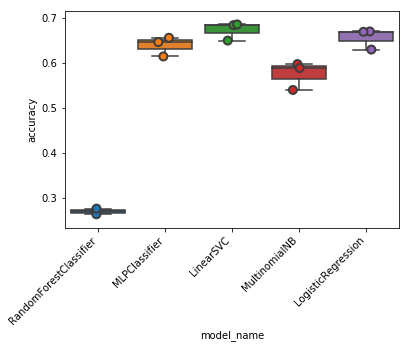

In [165]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.show()

In [166]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
LinearSVC                 0.673113
LogisticRegression        0.656297
MLPClassifier             0.638891
MultinomialNB             0.575350
RandomForestClassifier    0.270382
Name: accuracy, dtype: float64

# Best Model Evaluation: Linear Support Vector Classifier

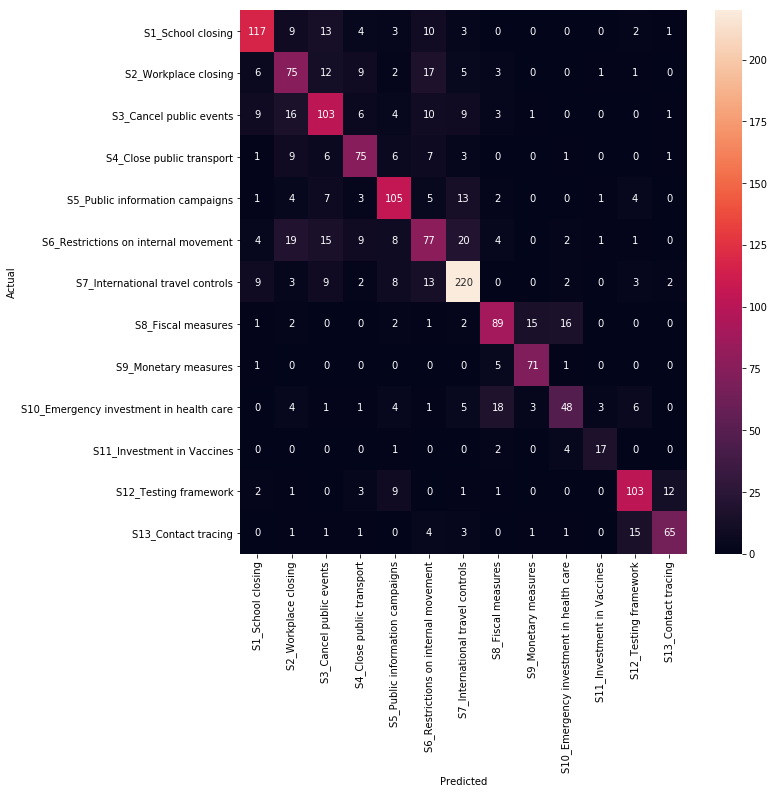

In [152]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df2_d.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories['category_name'].values, yticklabels=categories['category_name'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()